In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('US Monthly Air Passengers.csv')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6278820 entries, 0 to 6278819
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Sum_PASSENGERS       int64  
 1   AIRLINE_ID           float64
 2   CARRIER_NAME         object 
 3   ORIGIN               object 
 4   ORIGIN_CITY_NAME     object 
 5   ORIGIN_STATE_ABR     object 
 6   ORIGIN_STATE_NM      object 
 7   ORIGIN_COUNTRY       object 
 8   ORIGIN_COUNTRY_NAME  object 
 9   DEST                 object 
 10  DEST_CITY_NAME       object 
 11  DEST_STATE_ABR       object 
 12  DEST_STATE_NM        object 
 13  DEST_COUNTRY         object 
 14  DEST_COUNTRY_NAME    object 
 15  YEAR                 object 
 16  MONTH                object 
dtypes: float64(1), int64(1), object(15)
memory usage: 814.4+ MB


In [11]:
data[[ 'YEAR', 'MONTH']] = data[[ 'YEAR', 'MONTH']].astype(str)

In [13]:
data['Y-M']= data['YEAR']+'-'+data['MONTH'] 

In [17]:
df = data[['Sum_PASSENGERS', 'Y-M']]

In [21]:
len(df['Y-M'].value_counts())

250

In [32]:
x = df.groupby(pd.Grouper(key='Y-M', axis=0 ), as_index = False).sum()

In [33]:
x.columns = ['Month', 'Passengers']
x['Month'] = pd.to_datetime(x['Month'], format='%Y-%m')
x = x.set_index('Month')
x.head()

,Passengers
Month,
2015-03-01,76291641
2015-04-01,74068508
2015-01-01,65574499
2015-02-01,60835166
2009-05-01,65052202


In [56]:
data = x.copy()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2015-03-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  250 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


<AxesSubplot:xlabel='Month'>

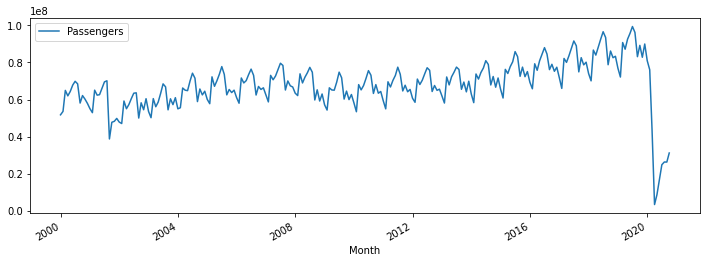

In [58]:
data.plot(figsize=(12,4))

### we dont any interpolation as we dont see any missing data .

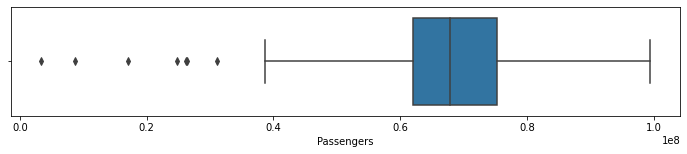

In [59]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=2)

In [60]:
p_05 = data['Passengers'].quantile(0.01) # 5th quantile
p_95 = data['Passengers'].quantile(0.99) # 95th quantile

data['Passengers'].clip(p_05, p_95, inplace=True)

<AxesSubplot:>

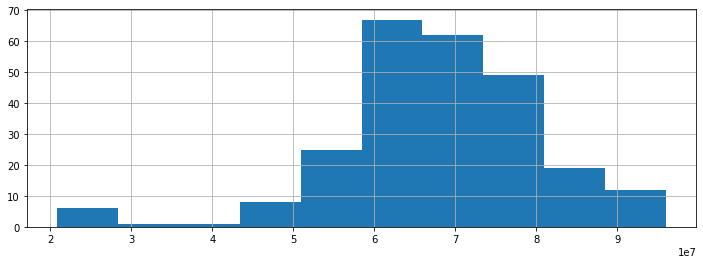

In [62]:
data['Passengers'].hist(figsize=(12,4))

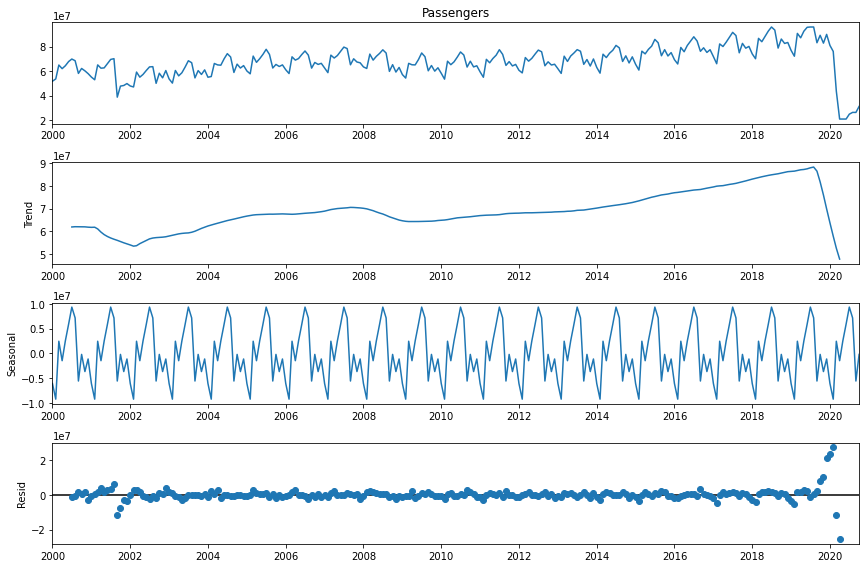

In [65]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
data.sort_index(inplace=True)
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

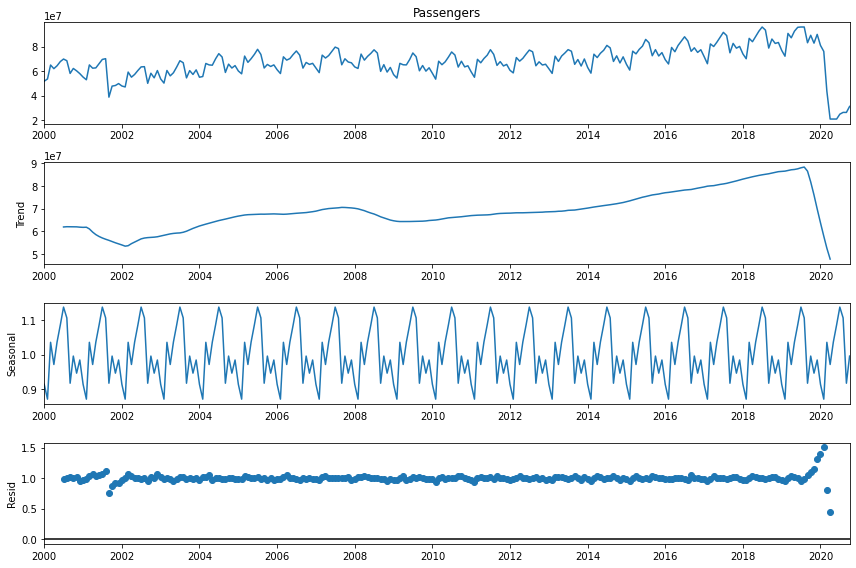

In [66]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [67]:
train_len = 180
train = data[0:train_len]
test = data[train_len:]